In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
import sys
from sklearn.svm import SVC
import numpy as np
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_score, f1_score, recall_score, roc_auc_score
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('train/train_demos.csv')
labels = pd.read_csv('train/train_labels.csv')

In [13]:
df =df.merge(labels, left_on='patient_id',right_on='patient_id')

In [201]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Assuming 'patient_id' is not useful for clustering, so we drop it
# Also assuming 'admittime' is not relevant for clustering in this example
# You might need to preprocess your categorical variables before applying clustering
df_clustering = df.drop(['patient_id', 'admittime'], axis=1)

# Preprocess categorical variables (e.g., one-hot encoding for 'gender', 'insurance', 'marital_status', 'ethnicity')

# Example: One-hot encoding for categorical variables
df_clustering = pd.get_dummies(df_clustering, columns=['gender', 'insurance', 'marital_status', 'ethnicity'])

# Standardize numerical features
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_clustering_scaled)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


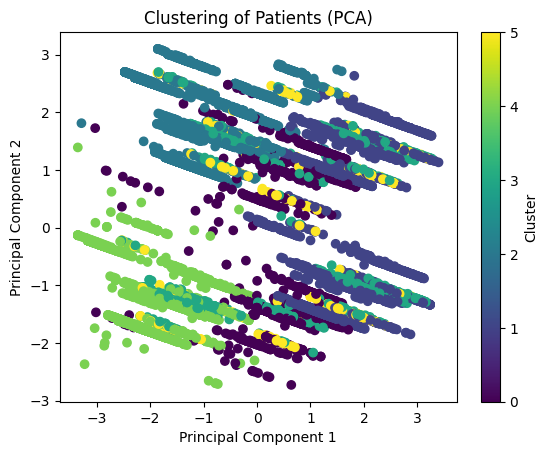

In [232]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Assuming 'patient_id' is not useful for clustering, so we drop it
# Also assuming 'admittime' is not relevant for clustering in this example
# You might need to preprocess your categorical variables before applying clustering
df_clustering = df.drop(['patient_id', 'admittime'], axis=1)

# Preprocess categorical variables (e.g., one-hot encoding for 'gender', 'insurance', 'marital_status', 'ethnicity')

# Example: One-hot encoding for categorical variables
df_clustering = pd.get_dummies(df_clustering, columns=['gender', 'insurance', 'marital_status', 'ethnicity'])

# Standardize numerical features
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
df_pca = pca.fit_transform(df_clustering_scaled)

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Specify the number of clusters
clusters = kmeans.fit_predict(df_clustering_scaled)

# Add the cluster labels to the original DataFrame
df['cluster'] = clusters

# Visualize the clusters using the reduced-dimensional data
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Patients (PCA)')
plt.colorbar(label='Cluster')
plt.show()


In [238]:

# Group the DataFrame by 'cluster' and 'label', and count the occurrences
cluster_label_counts = df.groupby(['cluster', 'label']).size().unstack(fill_value=0)

# Calculate the total count of each label in each cluster
cluster_total_counts = cluster_label_counts.sum(axis=1)

# Calculate the percentage of each label value in each cluster
cluster_label_percentages = cluster_label_counts.div(cluster_total_counts, axis=0) * 100

print("Percentage of each label value in each cluster:")
print(np.round(cluster_label_percentages,2))

Percentage of each label value in each cluster:
label        0      1
cluster              
0        93.81   6.19
1        93.12   6.88
2        88.95  11.05
3        79.00  21.00
4        90.08   9.92
5        90.59   9.41


,patient_id,age,gender,admittime,insurance,marital_status,ethnicity,cluster,label
0,p100001,56,M,2174-05-26 08:21:00,Other,MARRIED,WHITE,5,0
1,p100002,91,F,2176-11-25 21:28:00,Medicare,WIDOWED,BLACK/AFRICAN AMERICAN,2,0
2,p100004,83,F,2154-04-24 03:15:00,Other,DIVORCED,WHITE,5,0
3,p100006,72,M,2131-02-27 15:34:00,Medicare,NaN,UNKNOWN,4,0
4,p100007,59,M,2183-08-18 12:20:00,Other,MARRIED,WHITE,5,0
...,...,...,...,...,...,...,...,...,...
13703,p117116,64,M,2189-10-30 16:33:00,Other,MARRIED,WHITE,5,0
13704,p117124,73,M,2132-04-24 17:25:00,Medicare,MARRIED,BLACK/AFRICAN AMERICAN,1,0
13705,p117127,42,M,2141-04-21 17:05:00,Other,MARRIED,WHITE,5,0
13706,p117131,73,F,2170-10-19 07:15:00,Medicare,MARRIED,WHITE,2,0


In [143]:
df.drop(columns=['age','gender','admittime','insurance','marital_status','ethnicity']).to_csv("steven.csv")